<a href="https://colab.research.google.com/github/river6907/Bigdata-Analysis/blob/main/%EC%8B%A4%EC%8A%B58_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%83%9D%EC%A1%B4%EC%97%AC%EB%B6%80_%EB%B6%84%EB%A5%98_%EA%B0%95%EB%8F%99%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 8. 타이타닉호 데이터셋을 이용한 생존여부 분류 문제

타이타닉호 데이터셋을 이용한 생존여부 분류 문제

**(1) seaborn 에서 제공하는 타이타닉호 데이터 셋**  


In [ ]:
import seaborn as sns  

titanic = sns.load_dataset("titanic")    

2)주요속성값  

- survived : Yes=1, No=0  

- pclass(Ticket class) : 1등급=1, 2등급=2, 3등급=3  

- sibsp (# of siblings / spouses): 함께 탑승한 형제 또는 배우자 수  

- parch (# of parents / children): 함께 탑승한 부모 또는 자녀 수  

- ticket : 티켓 번호  

- fare (Passenger fare) : 여객운임  

- cabin : 선실 번호  

- embarked (Port of Embarkation): 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown  



**(2) 데이터 타입확인**

In [ ]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

**(3)데이터 구조확인**

In [ ]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [ ]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
titanic.values

array([[0, 3, 'male', ..., 'Southampton', 'no', False],
       [1, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [1, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [0, 3, 'female', ..., 'Southampton', 'no', False],
       [1, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [0, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

**(4)데이터 정보확인**

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**(5) 누락된 데이터의 합 확인**

In [ ]:
import pandas as pd
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

**(6)누락된 값이 많은 칼럼삭제**

In [ ]:
titanic = titanic.dropna(thresh=int(len(titanic)*0.5), axis=1)

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

**(7)누락된 값 있는 행삭제**

In [ ]:
titanic = titanic.dropna(axis=0)

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

**(8)요약통계**

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


**(9)성별을 female':1,'male':0으로 변경**

In [ ]:
titanic['sex'].replace([0,1],['male','female'],inplace=True)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


**(10)나이에 대한 histogram**

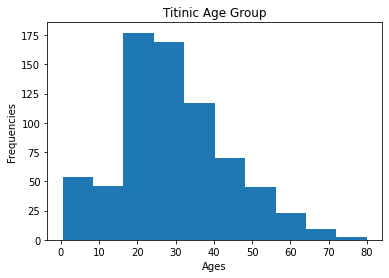

In [ ]:
import matplotlib.pyplot as plt
plt.hist(titanic['age'])
#히스토그램 제목
plt.title("Titinic Age Group")
#histogram x축 레이블
plt.xlabel("Ages")
#histogram y축 레이블
plt.ylabel("Frequencies")
plt.show()

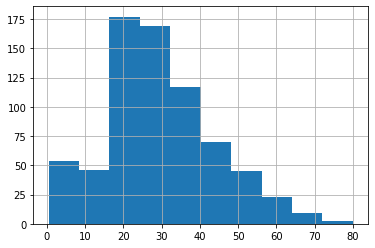

In [ ]:
titanic['age'].hist()

**(11)클래스에 대한 성별 생존 테이블로 재구성하여 막대그래프로 비교**

In [ ]:
table = pd.pivot_table(titanic, values='survived', index=['pclass'],columns=['sex'])
table

sex,female,male
pclass,,
1,0.963855,0.396040
2,0.918919,0.151515
3,0.460784,0.150198


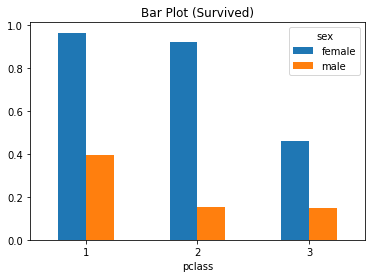

In [ ]:
table.plot.bar(rot=0)
plt.title("Bar Plot (Survived)")
plt.show()

**(12)특징값(X), 결과값(y) 선택**


* 특징값 : 성별(sex), 나이(age), 티켓클래스(pclass), 함께 탑승한 부모/자녀수(parch)

* 결과값 : 생존여부(survived)

In [ ]:
titanic['sex'].replace(['male','female'],[0,1],inplace=True)

In [ ]:
X = titanic[['sex','age','pclass','parch']]

In [ ]:
print(X)

     sex   age  pclass  parch
0      0  22.0       3      0
1      1  38.0       1      0
2      1  26.0       3      0
3      1  35.0       1      0
4      0  35.0       3      0
..   ...   ...     ...    ...
885    1  39.0       3      5
886    0  27.0       2      0
887    1  19.0       1      0
889    0  26.0       1      0
890    0  32.0       3      0

[712 rows x 4 columns]


In [ ]:
y = titanic[['survived']]

In [ ]:
print(X.shape)

(712, 4)


**(13)X,y를 이용한 train, test 분리**

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(X,y)

**(14)Logistic Regression train, test**

In [ ]:
from sklearn.linear_model import LogisticRegression
#로지스틱 회귀 인스턴스 생성
lr = LogisticRegression()
#훈련 데이터로 모델 훈련
logreg = lr.fit(train_input, train_target)
#예측 결과 출력
y_pred = logreg.predict(test_input)

**(15)Logistic Regression 예측 확률 확인**

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test_target, y_pred)
print("accuracy_score (MNIST 2-class, LogisticRegression) = {:.2f}".format(acc))

accuracy_score (MNIST 2-class, LogisticRegression) = 0.82


In [ ]:
print(logreg.predict_proba(test_input[:3]))
print()

[[0.60175687 0.39824313]
 [0.73825279 0.26174721]
 [0.73345547 0.26654453]]



**(16)새로운 데이터를 만들어 생존여부 및 예측 확률 확인**

* x1 = 남자, 30세, 1등석, 부모 2
* x2 = 여자, 25세, 3등석, 자녀3

In [ ]:
x1 = [[0,30,1,2]]
x2 = [[1,25,3,3]]
y1 = logreg.predict(x1)
y2 = logreg.predict(x2)
print(y1)
print(y2)
print(logreg.predict_proba(x1))
print(logreg.predict_proba(x2))

[0]
[0]
[[0.54297513 0.45702487]]
[[0.52713771 0.47286229]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
